In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from mini_yolov3.model import MiniYoloV3
from mini_yolov3.trainer import Trainer
import torch
from torchvision.transforms import v2
from mini_yolov3.dataset import SVHNDataset, collate_fn
from torch.utils.data import Subset, DataLoader
from mini_yolov3.loss import YOLOLoss, build_targets
import matplotlib.pyplot as plt
from mini_yolov3.utils import draw_bounding_boxes
from torchvision.ops import box_convert
from mini_yolov3.evals import calculate_mAP
from torchvision.ops import box_iou
from tqdm import tqdm

In [19]:
train_dataset = SVHNDataset(split="train")
# train_dataset = Subset(train_dataset, range(12, 13))
train_dataset = Subset(train_dataset, range(0, 2))

In [10]:
train_dataset[0]["bbox"]

tensor([[0.3551, 0.0217, 0.1963, 0.8696],
        [0.5327, 0.0652, 0.1495, 0.8696]])

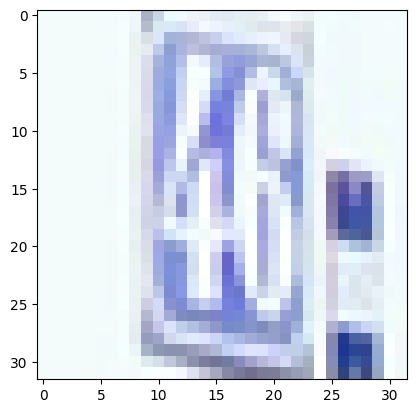

In [20]:
plt.imshow(train_dataset[0]["image"].permute(1, 2, 0))

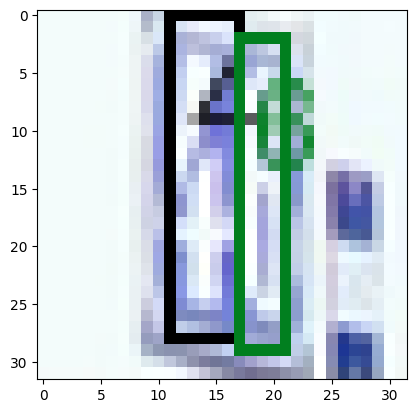

In [21]:
plt.imshow(
    draw_bounding_boxes(train_dataset[0]["image"], box_convert(train_dataset[0]["bbox"], "xywh", "xyxy"), train_dataset[0]["labels"])
)

In [22]:
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

In [23]:
for batch in dataloader:
    print(batch["bboxes"])
    print(box_convert(batch["bboxes"][0], "xywh", "cxcywh"))
    targets = build_targets(batch["bboxes"], batch["labels"], (2, 2), anchors, 10)

[tensor([[0.3551, 0.0217, 0.1963, 0.8696],
        [0.5327, 0.0652, 0.1495, 0.8696]]), tensor([[0.3443, 0.1290, 0.1967, 0.7419],
        [0.5082, 0.1613, 0.1639, 0.7419]])]
tensor([[0.4533, 0.4565, 0.1963, 0.8696],
        [0.6075, 0.5000, 0.1495, 0.8696]])


NameError: name 'anchors' is not defined

In [24]:
batch["images"].shape

torch.Size([2, 3, 32, 32])

In [25]:
import json

In [28]:
torch.manual_seed(0)

config = json.load(open("./configs/smol.json", "r"))
model = MiniYoloV3(**config)

trainer = Trainer(
    model=model,
    train_dataset=train_dataset,
    num_epochs=1500,
    lr=3e-3,
    batch_size=64,
    lambda_coord=1,
    lambda_noobj=1,
    device="cpu",
    eval_every=100000,
)

  0%|          | 2/1500 [00:00<02:08, 11.70it/s, class_loss=1.87, coord_loss=38.3, loss=41.6, noobj_loss=0.705, obj_conf_loss=0.712]

[Epoch 0] Loss: 45.92662811279297
[Epoch 1] Loss: 41.61876678466797


  0%|          | 4/1500 [00:00<02:51,  8.74it/s, class_loss=1.63, coord_loss=34.2, loss=37.2, noobj_loss=0.668, obj_conf_loss=0.703]

[Epoch 2] Loss: 39.18220901489258
[Epoch 3] Loss: 37.16039276123047


  0%|          | 6/1500 [00:00<03:16,  7.62it/s, class_loss=1.48, coord_loss=30.9, loss=33.7, noobj_loss=0.642, obj_conf_loss=0.645]

[Epoch 4] Loss: 35.476463317871094
[Epoch 5] Loss: 33.67350387573242


  1%|          | 8/1500 [00:01<03:17,  7.54it/s, class_loss=1.4, coord_loss=27.9, loss=30.4, noobj_loss=0.616, obj_conf_loss=0.536] 

[Epoch 6] Loss: 31.745702743530273
[Epoch 7] Loss: 30.44135093688965


  1%|          | 10/1500 [00:01<03:25,  7.25it/s, class_loss=1.33, coord_loss=26.1, loss=28.5, noobj_loss=0.595, obj_conf_loss=0.459]

[Epoch 8] Loss: 29.46734046936035
[Epoch 9] Loss: 28.48058319091797


  1%|          | 12/1500 [00:01<03:17,  7.52it/s, class_loss=1.31, coord_loss=24.2, loss=26.5, noobj_loss=0.572, obj_conf_loss=0.406]

[Epoch 10] Loss: 27.472665786743164
[Epoch 11] Loss: 26.527450561523438


  1%|          | 14/1500 [00:01<03:19,  7.44it/s, class_loss=1.25, coord_loss=22.7, loss=24.8, noobj_loss=0.551, obj_conf_loss=0.352]

[Epoch 12] Loss: 25.653783798217773
[Epoch 13] Loss: 24.836984634399414


  1%|          | 16/1500 [00:02<03:19,  7.43it/s, class_loss=1.18, coord_loss=21.4, loss=23.4, noobj_loss=0.531, obj_conf_loss=0.303]

[Epoch 14] Loss: 24.09332275390625
[Epoch 15] Loss: 23.436044692993164


  1%|          | 17/1500 [00:02<03:41,  6.71it/s, class_loss=1.13, coord_loss=20.9, loss=22.8, noobj_loss=0.522, obj_conf_loss=0.277]

[Epoch 16] Loss: 22.84060287475586


  1%|▏         | 19/1500 [00:02<03:48,  6.48it/s, class_loss=1.04, coord_loss=19.9, loss=21.7, noobj_loss=0.504, obj_conf_loss=0.226]

[Epoch 17] Loss: 22.2619686126709
[Epoch 18] Loss: 21.690195083618164


  1%|▏         | 21/1500 [00:02<03:31,  6.98it/s, class_loss=0.957, coord_loss=18.9, loss=20.6, noobj_loss=0.49, obj_conf_loss=0.185] 

[Epoch 19] Loss: 21.11874008178711
[Epoch 20] Loss: 20.558349609375


  2%|▏         | 23/1500 [00:03<03:57,  6.21it/s, class_loss=0.891, coord_loss=17.9, loss=19.5, noobj_loss=0.477, obj_conf_loss=0.152]

[Epoch 21] Loss: 20.008487701416016
[Epoch 22] Loss: 19.453264236450195


  2%|▏         | 25/1500 [00:03<03:46,  6.51it/s, class_loss=0.838, coord_loss=16.9, loss=18.3, noobj_loss=0.464, obj_conf_loss=0.129]

[Epoch 23] Loss: 18.89460563659668
[Epoch 24] Loss: 18.332847595214844


  2%|▏         | 27/1500 [00:03<03:39,  6.71it/s, class_loss=0.801, coord_loss=15.9, loss=17.2, noobj_loss=0.453, obj_conf_loss=0.111]

[Epoch 25] Loss: 17.772340774536133
[Epoch 26] Loss: 17.22121238708496


  2%|▏         | 29/1500 [00:04<03:30,  6.98it/s, class_loss=0.783, coord_loss=14.8, loss=16.2, noobj_loss=0.443, obj_conf_loss=0.0973]

[Epoch 27] Loss: 16.6845760345459
[Epoch 28] Loss: 16.163619995117188


  2%|▏         | 31/1500 [00:04<03:26,  7.10it/s, class_loss=0.761, coord_loss=13.9, loss=15.2, noobj_loss=0.434, obj_conf_loss=0.0869]

[Epoch 29] Loss: 15.654328346252441
[Epoch 30] Loss: 15.157771110534668


  2%|▏         | 33/1500 [00:04<03:24,  7.16it/s, class_loss=0.735, coord_loss=13, loss=14.2, noobj_loss=0.425, obj_conf_loss=0.0787]  

[Epoch 31] Loss: 14.673005104064941
[Epoch 32] Loss: 14.200180053710938


  2%|▏         | 34/1500 [00:04<03:39,  6.68it/s, class_loss=0.724, coord_loss=12.5, loss=13.7, noobj_loss=0.421, obj_conf_loss=0.0753]

[Epoch 33] Loss: 13.740234375


  2%|▏         | 36/1500 [00:05<04:40,  5.22it/s, class_loss=0.701, coord_loss=11.7, loss=12.9, noobj_loss=0.413, obj_conf_loss=0.07]  

[Epoch 34] Loss: 13.292972564697266
[Epoch 35] Loss: 12.857086181640625


  3%|▎         | 38/1500 [00:05<03:58,  6.12it/s, class_loss=0.68, coord_loss=10.9, loss=12, noobj_loss=0.405, obj_conf_loss=0.0663]  

[Epoch 36] Loss: 12.430757522583008
[Epoch 37] Loss: 12.013442039489746


  3%|▎         | 40/1500 [00:05<03:41,  6.58it/s, class_loss=0.657, coord_loss=10.1, loss=11.2, noobj_loss=0.398, obj_conf_loss=0.0634]

[Epoch 38] Loss: 11.606513023376465
[Epoch 39] Loss: 11.209150314331055


  3%|▎         | 42/1500 [00:06<03:32,  6.87it/s, class_loss=0.633, coord_loss=9.36, loss=10.4, noobj_loss=0.392, obj_conf_loss=0.0605]

[Epoch 40] Loss: 10.82105541229248
[Epoch 41] Loss: 10.44310474395752


  3%|▎         | 44/1500 [00:06<03:39,  6.63it/s, class_loss=0.608, coord_loss=8.66, loss=9.72, noobj_loss=0.386, obj_conf_loss=0.0587]

[Epoch 42] Loss: 10.075617790222168
[Epoch 43] Loss: 9.7158784866333


  3%|▎         | 46/1500 [00:06<03:50,  6.30it/s, class_loss=0.587, coord_loss=7.97, loss=9, noobj_loss=0.38, obj_conf_loss=0.0584]    

[Epoch 44] Loss: 9.354504585266113
[Epoch 45] Loss: 8.99945068359375


  3%|▎         | 48/1500 [00:07<03:33,  6.79it/s, class_loss=0.577, coord_loss=7.3, loss=8.31, noobj_loss=0.374, obj_conf_loss=0.0579] 

[Epoch 46] Loss: 8.652698516845703
[Epoch 47] Loss: 8.312986373901367


  3%|▎         | 50/1500 [00:07<03:52,  6.25it/s, class_loss=0.567, coord_loss=6.67, loss=7.66, noobj_loss=0.368, obj_conf_loss=0.0568]

[Epoch 48] Loss: 7.982632160186768
[Epoch 49] Loss: 7.661938667297363


  3%|▎         | 52/1500 [00:07<03:38,  6.62it/s, class_loss=0.554, coord_loss=6.07, loss=7.05, noobj_loss=0.363, obj_conf_loss=0.0555]

[Epoch 50] Loss: 7.3480963706970215
[Epoch 51] Loss: 7.045783042907715


  4%|▎         | 54/1500 [00:07<03:37,  6.66it/s, class_loss=0.543, coord_loss=5.52, loss=6.47, noobj_loss=0.357, obj_conf_loss=0.0539]

[Epoch 52] Loss: 6.754555702209473
[Epoch 53] Loss: 6.4740681648254395


  4%|▎         | 56/1500 [00:08<03:41,  6.52it/s, class_loss=0.536, coord_loss=5.01, loss=5.95, noobj_loss=0.353, obj_conf_loss=0.0515]

[Epoch 54] Loss: 6.205203533172607
[Epoch 55] Loss: 5.946930408477783


  4%|▍         | 58/1500 [00:08<03:30,  6.85it/s, class_loss=0.535, coord_loss=4.53, loss=5.46, noobj_loss=0.348, obj_conf_loss=0.0492]

[Epoch 56] Loss: 5.6990485191345215
[Epoch 57] Loss: 5.460933685302734


  4%|▍         | 60/1500 [00:08<03:22,  7.12it/s, class_loss=0.535, coord_loss=4.09, loss=5.01, noobj_loss=0.343, obj_conf_loss=0.0471]

[Epoch 58] Loss: 5.232088565826416
[Epoch 59] Loss: 5.012154579162598


  4%|▍         | 62/1500 [00:09<03:20,  7.17it/s, class_loss=0.531, coord_loss=3.68, loss=4.6, noobj_loss=0.338, obj_conf_loss=0.0457] 

[Epoch 60] Loss: 4.800747871398926
[Epoch 61] Loss: 4.597096920013428


  4%|▍         | 64/1500 [00:09<03:37,  6.60it/s, class_loss=0.525, coord_loss=3.31, loss=4.21, noobj_loss=0.333, obj_conf_loss=0.0448]

[Epoch 62] Loss: 4.4016618728637695
[Epoch 63] Loss: 4.214387893676758


  4%|▍         | 66/1500 [00:09<04:19,  5.53it/s, class_loss=0.518, coord_loss=2.98, loss=3.87, noobj_loss=0.327, obj_conf_loss=0.0442]

[Epoch 64] Loss: 4.035411357879639
[Epoch 65] Loss: 3.865447998046875


  5%|▍         | 68/1500 [00:10<03:46,  6.33it/s, class_loss=0.509, coord_loss=2.67, loss=3.54, noobj_loss=0.322, obj_conf_loss=0.0437]

[Epoch 66] Loss: 3.699716567993164
[Epoch 67] Loss: 3.543247699737549


  5%|▍         | 70/1500 [00:10<03:47,  6.29it/s, class_loss=0.499, coord_loss=2.39, loss=3.25, noobj_loss=0.316, obj_conf_loss=0.0434]

[Epoch 68] Loss: 3.3942337036132812
[Epoch 69] Loss: 3.2521047592163086


  5%|▍         | 72/1500 [00:10<03:41,  6.44it/s, class_loss=0.487, coord_loss=2.14, loss=2.99, noobj_loss=0.311, obj_conf_loss=0.0433]

[Epoch 70] Loss: 3.1160407066345215
[Epoch 71] Loss: 2.9855213165283203


  5%|▍         | 74/1500 [00:11<03:34,  6.65it/s, class_loss=0.475, coord_loss=1.92, loss=2.74, noobj_loss=0.305, obj_conf_loss=0.0433]

[Epoch 72] Loss: 2.860546350479126
[Epoch 73] Loss: 2.7414255142211914


  5%|▌         | 76/1500 [00:11<03:27,  6.86it/s, class_loss=0.463, coord_loss=1.72, loss=2.52, noobj_loss=0.3, obj_conf_loss=0.0432]  

[Epoch 74] Loss: 2.628141403198242
[Epoch 75] Loss: 2.520815134048462


  5%|▌         | 78/1500 [00:11<03:31,  6.72it/s, class_loss=0.449, coord_loss=1.54, loss=2.32, noobj_loss=0.294, obj_conf_loss=0.0433]

[Epoch 76] Loss: 2.4191131591796875
[Epoch 77] Loss: 2.32253360748291


  5%|▌         | 80/1500 [00:11<03:22,  7.01it/s, class_loss=0.435, coord_loss=1.38, loss=2.14, noobj_loss=0.289, obj_conf_loss=0.0431]

[Epoch 78] Loss: 2.230516195297241
[Epoch 79] Loss: 2.143730878829956


  5%|▌         | 82/1500 [00:12<03:13,  7.31it/s, class_loss=0.419, coord_loss=1.23, loss=1.98, noobj_loss=0.284, obj_conf_loss=0.0429]

[Epoch 80] Loss: 2.058180093765259
[Epoch 81] Loss: 1.9778046607971191


  6%|▌         | 84/1500 [00:12<03:11,  7.40it/s, class_loss=0.402, coord_loss=1.11, loss=1.83, noobj_loss=0.279, obj_conf_loss=0.0427]

[Epoch 82] Loss: 1.9015406370162964
[Epoch 83] Loss: 1.8291940689086914


  6%|▌         | 86/1500 [00:12<03:33,  6.63it/s, class_loss=0.386, coord_loss=0.993, loss=1.69, noobj_loss=0.274, obj_conf_loss=0.0424]

[Epoch 84] Loss: 1.760443925857544
[Epoch 85] Loss: 1.6948471069335938


  6%|▌         | 88/1500 [00:13<03:27,  6.79it/s, class_loss=0.368, coord_loss=0.892, loss=1.57, noobj_loss=0.269, obj_conf_loss=0.0421]

[Epoch 86] Loss: 1.632045030593872
[Epoch 87] Loss: 1.570810317993164


  6%|▌         | 90/1500 [00:13<03:21,  6.99it/s, class_loss=0.351, coord_loss=0.787, loss=1.44, noobj_loss=0.264, obj_conf_loss=0.042] 

[Epoch 88] Loss: 1.5074985027313232
[Epoch 89] Loss: 1.4448273181915283


  6%|▌         | 92/1500 [00:13<03:15,  7.20it/s, class_loss=0.333, coord_loss=0.692, loss=1.33, noobj_loss=0.26, obj_conf_loss=0.0419] 

[Epoch 90] Loss: 1.3843461275100708
[Epoch 91] Loss: 1.3261913061141968


  6%|▋         | 94/1500 [00:13<03:17,  7.11it/s, class_loss=0.317, coord_loss=0.604, loss=1.22, noobj_loss=0.255, obj_conf_loss=0.0418]

[Epoch 92] Loss: 1.270007848739624
[Epoch 93] Loss: 1.217320442199707


  6%|▋         | 96/1500 [00:14<03:17,  7.10it/s, class_loss=0.302, coord_loss=0.532, loss=1.13, noobj_loss=0.25, obj_conf_loss=0.0415] 

[Epoch 94] Loss: 1.169166922569275
[Epoch 95] Loss: 1.1251392364501953


  7%|▋         | 98/1500 [00:14<04:16,  5.46it/s, class_loss=0.282, coord_loss=0.477, loss=1.05, noobj_loss=0.245, obj_conf_loss=0.0409]

[Epoch 96] Loss: 1.0848445892333984
[Epoch 97] Loss: 1.0454835891723633


  7%|▋         | 100/1500 [00:15<04:03,  5.75it/s, class_loss=0.261, coord_loss=0.433, loss=0.976, noobj_loss=0.242, obj_conf_loss=0.0403]

[Epoch 98] Loss: 1.0093364715576172
[Epoch 99] Loss: 0.9758217334747314


  7%|▋         | 102/1500 [00:15<03:38,  6.40it/s, class_loss=0.243, coord_loss=0.393, loss=0.914, noobj_loss=0.238, obj_conf_loss=0.0398]

[Epoch 100] Loss: 0.94428950548172
[Epoch 101] Loss: 0.9141162633895874


  7%|▋         | 104/1500 [00:15<03:30,  6.62it/s, class_loss=0.229, coord_loss=0.356, loss=0.858, noobj_loss=0.234, obj_conf_loss=0.0394]

[Epoch 102] Loss: 0.8851902484893799
[Epoch 103] Loss: 0.8577994108200073


  7%|▋         | 106/1500 [00:15<03:22,  6.88it/s, class_loss=0.217, coord_loss=0.322, loss=0.808, noobj_loss=0.23, obj_conf_loss=0.0389] 

[Epoch 104] Loss: 0.8320276737213135
[Epoch 105] Loss: 0.8076145648956299


  7%|▋         | 108/1500 [00:16<03:39,  6.34it/s, class_loss=0.204, coord_loss=0.294, loss=0.762, noobj_loss=0.226, obj_conf_loss=0.0385]

[Epoch 106] Loss: 0.7843228578567505
[Epoch 107] Loss: 0.7621800899505615


  7%|▋         | 110/1500 [00:16<03:30,  6.60it/s, class_loss=0.191, coord_loss=0.269, loss=0.722, noobj_loss=0.223, obj_conf_loss=0.038] 

[Epoch 108] Loss: 0.7413346767425537
[Epoch 109] Loss: 0.721735954284668


  7%|▋         | 112/1500 [00:16<03:21,  6.90it/s, class_loss=0.181, coord_loss=0.247, loss=0.686, noobj_loss=0.219, obj_conf_loss=0.0377]

[Epoch 110] Loss: 0.7031795382499695
[Epoch 111] Loss: 0.6855961680412292


  8%|▊         | 114/1500 [00:17<03:25,  6.76it/s, class_loss=0.173, coord_loss=0.227, loss=0.653, noobj_loss=0.216, obj_conf_loss=0.0374]

[Epoch 112] Loss: 0.6690739393234253
[Epoch 113] Loss: 0.6531918048858643


  8%|▊         | 116/1500 [00:17<03:15,  7.09it/s, class_loss=0.166, coord_loss=0.209, loss=0.624, noobj_loss=0.212, obj_conf_loss=0.0369]

[Epoch 114] Loss: 0.6383441686630249
[Epoch 115] Loss: 0.6242089867591858


  8%|▊         | 118/1500 [00:17<03:09,  7.28it/s, class_loss=0.159, coord_loss=0.194, loss=0.598, noobj_loss=0.209, obj_conf_loss=0.036] 

[Epoch 116] Loss: 0.610653281211853
[Epoch 117] Loss: 0.5976365208625793


  8%|▊         | 120/1500 [00:17<03:06,  7.38it/s, class_loss=0.152, coord_loss=0.179, loss=0.573, noobj_loss=0.206, obj_conf_loss=0.0349]

[Epoch 118] Loss: 0.5849865078926086
[Epoch 119] Loss: 0.572670578956604


  8%|▊         | 122/1500 [00:18<03:09,  7.28it/s, class_loss=0.146, coord_loss=0.166, loss=0.549, noobj_loss=0.203, obj_conf_loss=0.0338]

[Epoch 120] Loss: 0.5613518357276917
[Epoch 121] Loss: 0.5492788553237915


  8%|▊         | 124/1500 [00:18<03:20,  6.87it/s, class_loss=0.14, coord_loss=0.153, loss=0.527, noobj_loss=0.2, obj_conf_loss=0.033]    

[Epoch 122] Loss: 0.5380856394767761
[Epoch 123] Loss: 0.5271214246749878


  8%|▊         | 126/1500 [00:18<03:52,  5.91it/s, class_loss=0.135, coord_loss=0.141, loss=0.506, noobj_loss=0.197, obj_conf_loss=0.0324]

[Epoch 124] Loss: 0.5164090991020203
[Epoch 125] Loss: 0.5059494376182556


  9%|▊         | 128/1500 [00:19<03:29,  6.55it/s, class_loss=0.129, coord_loss=0.13, loss=0.486, noobj_loss=0.195, obj_conf_loss=0.0319] 

[Epoch 126] Loss: 0.4958426058292389
[Epoch 127] Loss: 0.4856964647769928


  9%|▊         | 130/1500 [00:19<03:18,  6.91it/s, class_loss=0.122, coord_loss=0.121, loss=0.466, noobj_loss=0.191, obj_conf_loss=0.0317]

[Epoch 128] Loss: 0.4759170413017273
[Epoch 129] Loss: 0.4663082957267761


  9%|▉         | 132/1500 [00:19<03:25,  6.65it/s, class_loss=0.116, coord_loss=0.112, loss=0.448, noobj_loss=0.188, obj_conf_loss=0.0317]

[Epoch 130] Loss: 0.45685020089149475
[Epoch 131] Loss: 0.4475410580635071


  9%|▉         | 134/1500 [00:20<03:20,  6.82it/s, class_loss=0.11, coord_loss=0.103, loss=0.43, noobj_loss=0.185, obj_conf_loss=0.032]   

[Epoch 132] Loss: 0.43840736150741577
[Epoch 133] Loss: 0.42978477478027344


  9%|▉         | 136/1500 [00:20<03:18,  6.88it/s, class_loss=0.104, coord_loss=0.0952, loss=0.412, noobj_loss=0.181, obj_conf_loss=0.0326]

[Epoch 134] Loss: 0.4207470417022705
[Epoch 135] Loss: 0.412240207195282


  9%|▉         | 138/1500 [00:20<03:13,  7.05it/s, class_loss=0.0975, coord_loss=0.0877, loss=0.396, noobj_loss=0.177, obj_conf_loss=0.0332]

[Epoch 136] Loss: 0.4039155840873718
[Epoch 137] Loss: 0.39576488733291626


  9%|▉         | 140/1500 [00:20<03:12,  7.05it/s, class_loss=0.092, coord_loss=0.0803, loss=0.38, noobj_loss=0.174, obj_conf_loss=0.0338]  

[Epoch 138] Loss: 0.38776668906211853
[Epoch 139] Loss: 0.37991732358932495


  9%|▉         | 142/1500 [00:21<03:08,  7.19it/s, class_loss=0.0869, coord_loss=0.0729, loss=0.365, noobj_loss=0.171, obj_conf_loss=0.0343]

[Epoch 140] Loss: 0.37222591042518616
[Epoch 141] Loss: 0.36471110582351685


 10%|▉         | 144/1500 [00:21<03:14,  6.97it/s, class_loss=0.0824, coord_loss=0.0657, loss=0.35, noobj_loss=0.167, obj_conf_loss=0.0347] 

[Epoch 142] Loss: 0.3573833107948303
[Epoch 143] Loss: 0.3502561151981354


 10%|▉         | 146/1500 [00:21<03:09,  7.16it/s, class_loss=0.078, coord_loss=0.0591, loss=0.337, noobj_loss=0.164, obj_conf_loss=0.0352]

[Epoch 144] Loss: 0.3433336615562439
[Epoch 145] Loss: 0.33660656213760376


 10%|▉         | 148/1500 [00:22<03:19,  6.78it/s, class_loss=0.0738, coord_loss=0.053, loss=0.324, noobj_loss=0.161, obj_conf_loss=0.0354]

[Epoch 146] Loss: 0.33008167147636414
[Epoch 147] Loss: 0.32376521825790405


 10%|▉         | 149/1500 [00:22<03:13,  6.98it/s, class_loss=0.0718, coord_loss=0.0502, loss=0.318, noobj_loss=0.16, obj_conf_loss=0.0355]

[Epoch 148] Loss: 0.3176194429397583


 10%|█         | 151/1500 [00:22<03:57,  5.69it/s, class_loss=0.0679, coord_loss=0.0448, loss=0.306, noobj_loss=0.158, obj_conf_loss=0.0356]

[Epoch 149] Loss: 0.3116605281829834
[Epoch 150] Loss: 0.30581021308898926


 10%|█         | 153/1500 [00:22<03:33,  6.32it/s, class_loss=0.0643, coord_loss=0.0399, loss=0.295, noobj_loss=0.155, obj_conf_loss=0.0355]

[Epoch 151] Loss: 0.30015355348587036
[Epoch 152] Loss: 0.29468846321105957


 10%|█         | 155/1500 [00:23<03:24,  6.57it/s, class_loss=0.0611, coord_loss=0.0352, loss=0.284, noobj_loss=0.153, obj_conf_loss=0.0353]

[Epoch 153] Loss: 0.2893851399421692
[Epoch 154] Loss: 0.2842939496040344


 10%|█         | 157/1500 [00:23<03:16,  6.82it/s, class_loss=0.0584, coord_loss=0.0307, loss=0.275, noobj_loss=0.15, obj_conf_loss=0.035]  

[Epoch 155] Loss: 0.27938809990882874
[Epoch 156] Loss: 0.27463874220848083


 11%|█         | 159/1500 [00:23<03:13,  6.94it/s, class_loss=0.0558, coord_loss=0.0268, loss=0.266, noobj_loss=0.148, obj_conf_loss=0.0346]

[Epoch 157] Loss: 0.27003613114356995
[Epoch 158] Loss: 0.26557767391204834


 11%|█         | 161/1500 [00:24<03:21,  6.64it/s, class_loss=0.0533, coord_loss=0.0233, loss=0.257, noobj_loss=0.146, obj_conf_loss=0.0341]

[Epoch 159] Loss: 0.26126495003700256
[Epoch 160] Loss: 0.25710442662239075


 11%|█         | 163/1500 [00:24<03:16,  6.81it/s, class_loss=0.0509, coord_loss=0.0203, loss=0.249, noobj_loss=0.144, obj_conf_loss=0.0337]

[Epoch 161] Loss: 0.25309357047080994
[Epoch 162] Loss: 0.24922260642051697


 11%|█         | 165/1500 [00:24<03:12,  6.92it/s, class_loss=0.0485, coord_loss=0.0176, loss=0.242, noobj_loss=0.143, obj_conf_loss=0.0332]

[Epoch 163] Loss: 0.2454841136932373
[Epoch 164] Loss: 0.2418707311153412


 11%|█         | 167/1500 [00:24<03:09,  7.02it/s, class_loss=0.0463, coord_loss=0.0153, loss=0.235, noobj_loss=0.141, obj_conf_loss=0.0327]

[Epoch 165] Loss: 0.23838037252426147
[Epoch 166] Loss: 0.23500998318195343


 11%|█▏        | 169/1500 [00:25<03:07,  7.09it/s, class_loss=0.0442, coord_loss=0.0133, loss=0.229, noobj_loss=0.139, obj_conf_loss=0.0323]

[Epoch 167] Loss: 0.23175305128097534
[Epoch 168] Loss: 0.22860829532146454


 11%|█▏        | 171/1500 [00:25<03:03,  7.24it/s, class_loss=0.0421, coord_loss=0.0116, loss=0.223, noobj_loss=0.137, obj_conf_loss=0.0319]

[Epoch 169] Loss: 0.2255670726299286
[Epoch 170] Loss: 0.22262927889823914


 12%|█▏        | 173/1500 [00:25<03:08,  7.05it/s, class_loss=0.0402, coord_loss=0.01, loss=0.217, noobj_loss=0.135, obj_conf_loss=0.0316]  

[Epoch 171] Loss: 0.2197948694229126
[Epoch 172] Loss: 0.21705684065818787


 12%|█▏        | 175/1500 [00:26<03:20,  6.60it/s, class_loss=0.0384, coord_loss=0.00875, loss=0.212, noobj_loss=0.133, obj_conf_loss=0.0313]

[Epoch 173] Loss: 0.21440918743610382
[Epoch 174] Loss: 0.21185019612312317


 12%|█▏        | 176/1500 [00:26<03:13,  6.85it/s, class_loss=0.0375, coord_loss=0.00816, loss=0.209, noobj_loss=0.133, obj_conf_loss=0.0311]

[Epoch 175] Loss: 0.2093760371208191


 12%|█▏        | 178/1500 [00:26<04:11,  5.25it/s, class_loss=0.0359, coord_loss=0.00712, loss=0.205, noobj_loss=0.131, obj_conf_loss=0.0309]

[Epoch 176] Loss: 0.20697829127311707
[Epoch 177] Loss: 0.20465826988220215


 12%|█▏        | 180/1500 [00:27<03:50,  5.74it/s, class_loss=0.0343, coord_loss=0.00622, loss=0.2, noobj_loss=0.129, obj_conf_loss=0.0307]  

[Epoch 178] Loss: 0.2024122178554535
[Epoch 179] Loss: 0.20023536682128906


 12%|█▏        | 182/1500 [00:27<03:51,  5.68it/s, class_loss=0.0328, coord_loss=0.00543, loss=0.196, noobj_loss=0.127, obj_conf_loss=0.0305]

[Epoch 180] Loss: 0.19812369346618652
[Epoch 181] Loss: 0.1960746794939041


 12%|█▏        | 184/1500 [00:27<03:58,  5.51it/s, class_loss=0.0315, coord_loss=0.00475, loss=0.192, noobj_loss=0.126, obj_conf_loss=0.0303]

[Epoch 182] Loss: 0.1940912902355194
[Epoch 183] Loss: 0.19216760993003845


 12%|█▏        | 186/1500 [00:28<03:36,  6.06it/s, class_loss=0.0302, coord_loss=0.00416, loss=0.188, noobj_loss=0.124, obj_conf_loss=0.0302]

[Epoch 184] Loss: 0.19029942154884338
[Epoch 185] Loss: 0.18848487734794617


 13%|█▎        | 188/1500 [00:28<03:23,  6.44it/s, class_loss=0.029, coord_loss=0.00364, loss=0.185, noobj_loss=0.122, obj_conf_loss=0.03]   

[Epoch 186] Loss: 0.1867213100194931
[Epoch 187] Loss: 0.1850060671567917


 13%|█▎        | 190/1500 [00:28<03:36,  6.04it/s, class_loss=0.0279, coord_loss=0.00318, loss=0.182, noobj_loss=0.121, obj_conf_loss=0.0299]

[Epoch 188] Loss: 0.18333768844604492
[Epoch 189] Loss: 0.18171577155590057


 13%|█▎        | 192/1500 [00:29<03:32,  6.15it/s, class_loss=0.0268, coord_loss=0.00277, loss=0.179, noobj_loss=0.119, obj_conf_loss=0.0298]

[Epoch 190] Loss: 0.18013492226600647
[Epoch 191] Loss: 0.1785958856344223


 13%|█▎        | 194/1500 [00:29<03:32,  6.16it/s, class_loss=0.0259, coord_loss=0.00241, loss=0.176, noobj_loss=0.118, obj_conf_loss=0.0296]

[Epoch 192] Loss: 0.17709797620773315
[Epoch 193] Loss: 0.17563998699188232


 13%|█▎        | 196/1500 [00:29<03:20,  6.51it/s, class_loss=0.0249, coord_loss=0.00212, loss=0.173, noobj_loss=0.116, obj_conf_loss=0.0295]

[Epoch 194] Loss: 0.174215629696846
[Epoch 195] Loss: 0.17281335592269897


 13%|█▎        | 198/1500 [00:30<03:33,  6.09it/s, class_loss=0.0239, coord_loss=0.00189, loss=0.17, noobj_loss=0.115, obj_conf_loss=0.0294] 

[Epoch 196] Loss: 0.1714348942041397
[Epoch 197] Loss: 0.17008641362190247


 13%|█▎        | 200/1500 [00:30<03:36,  6.00it/s, class_loss=0.023, coord_loss=0.00171, loss=0.167, noobj_loss=0.113, obj_conf_loss=0.0294]

[Epoch 198] Loss: 0.1687701791524887
[Epoch 199] Loss: 0.1674843430519104


 13%|█▎        | 202/1500 [00:30<03:33,  6.09it/s, class_loss=0.0221, coord_loss=0.00156, loss=0.165, noobj_loss=0.112, obj_conf_loss=0.0293]

[Epoch 200] Loss: 0.16622936725616455
[Epoch 201] Loss: 0.1650053709745407


 14%|█▎        | 204/1500 [00:31<04:18,  5.01it/s, class_loss=0.0213, coord_loss=0.00142, loss=0.163, noobj_loss=0.111, obj_conf_loss=0.0292]

[Epoch 202] Loss: 0.16381235420703888
[Epoch 203] Loss: 0.16264845430850983


 14%|█▎        | 206/1500 [00:31<03:40,  5.86it/s, class_loss=0.0205, coord_loss=0.00129, loss=0.16, noobj_loss=0.109, obj_conf_loss=0.0291] 

[Epoch 204] Loss: 0.16151180863380432
[Epoch 205] Loss: 0.16039897501468658


 14%|█▍        | 208/1500 [00:31<03:41,  5.83it/s, class_loss=0.0199, coord_loss=0.00113, loss=0.158, noobj_loss=0.108, obj_conf_loss=0.0291]

[Epoch 206] Loss: 0.15931129455566406
[Epoch 207] Loss: 0.1583048403263092


 14%|█▍        | 210/1500 [00:32<03:22,  6.38it/s, class_loss=0.0194, coord_loss=0.000997, loss=0.156, noobj_loss=0.107, obj_conf_loss=0.0292]

[Epoch 208] Loss: 0.15735462307929993
[Epoch 209] Loss: 0.1564382165670395


 14%|█▍        | 212/1500 [00:32<03:23,  6.34it/s, class_loss=0.0189, coord_loss=0.000892, loss=0.155, noobj_loss=0.106, obj_conf_loss=0.0291]

[Epoch 210] Loss: 0.15554073452949524
[Epoch 211] Loss: 0.154655322432518


 14%|█▍        | 214/1500 [00:32<03:23,  6.31it/s, class_loss=0.0184, coord_loss=0.000797, loss=0.153, noobj_loss=0.105, obj_conf_loss=0.029] 

[Epoch 212] Loss: 0.15378087759017944
[Epoch 213] Loss: 0.15292057394981384


 14%|█▍        | 216/1500 [00:33<03:19,  6.43it/s, class_loss=0.018, coord_loss=0.000736, loss=0.151, noobj_loss=0.104, obj_conf_loss=0.0289]

[Epoch 214] Loss: 0.15207362174987793
[Epoch 215] Loss: 0.1512405276298523


 15%|█▍        | 218/1500 [00:33<03:34,  5.99it/s, class_loss=0.0175, coord_loss=0.000706, loss=0.15, noobj_loss=0.103, obj_conf_loss=0.0288]

[Epoch 216] Loss: 0.15042026340961456
[Epoch 217] Loss: 0.14961571991443634


 15%|█▍        | 220/1500 [00:33<03:30,  6.09it/s, class_loss=0.017, coord_loss=0.000702, loss=0.148, noobj_loss=0.102, obj_conf_loss=0.0287] 

[Epoch 218] Loss: 0.1488288938999176
[Epoch 219] Loss: 0.1480603963136673


 15%|█▍        | 222/1500 [00:34<03:22,  6.31it/s, class_loss=0.0166, coord_loss=0.000696, loss=0.147, noobj_loss=0.101, obj_conf_loss=0.0286]

[Epoch 220] Loss: 0.14730708301067352
[Epoch 221] Loss: 0.14656580984592438


 15%|█▍        | 224/1500 [00:34<03:13,  6.59it/s, class_loss=0.0162, coord_loss=0.000653, loss=0.145, noobj_loss=0.0999, obj_conf_loss=0.0284]

[Epoch 222] Loss: 0.14583058655261993
[Epoch 223] Loss: 0.1450999528169632


 15%|█▌        | 226/1500 [00:34<03:27,  6.14it/s, class_loss=0.0158, coord_loss=0.000586, loss=0.144, noobj_loss=0.099, obj_conf_loss=0.0282] 

[Epoch 224] Loss: 0.14437973499298096
[Epoch 225] Loss: 0.1436706930398941


 15%|█▌        | 228/1500 [00:34<03:25,  6.19it/s, class_loss=0.0155, coord_loss=0.000525, loss=0.142, noobj_loss=0.0982, obj_conf_loss=0.0281]

[Epoch 226] Loss: 0.14297859370708466
[Epoch 227] Loss: 0.14229869842529297


 15%|█▌        | 230/1500 [00:35<03:19,  6.36it/s, class_loss=0.0152, coord_loss=0.00048, loss=0.141, noobj_loss=0.0974, obj_conf_loss=0.0279] 

[Epoch 228] Loss: 0.14162850379943848
[Epoch 229] Loss: 0.14096800982952118


 15%|█▌        | 232/1500 [00:35<03:54,  5.40it/s, class_loss=0.0149, coord_loss=0.00045, loss=0.14, noobj_loss=0.0966, obj_conf_loss=0.0278] 

[Epoch 230] Loss: 0.14031748473644257
[Epoch 231] Loss: 0.13967694342136383


 16%|█▌        | 234/1500 [00:36<03:43,  5.67it/s, class_loss=0.0146, coord_loss=0.000425, loss=0.138, noobj_loss=0.0958, obj_conf_loss=0.0276]

[Epoch 232] Loss: 0.13904570043087006
[Epoch 233] Loss: 0.13842171430587769


 16%|█▌        | 236/1500 [00:36<03:18,  6.38it/s, class_loss=0.0143, coord_loss=0.000394, loss=0.137, noobj_loss=0.0951, obj_conf_loss=0.0275]

[Epoch 234] Loss: 0.13780422508716583
[Epoch 235] Loss: 0.1371941715478897


 16%|█▌        | 238/1500 [00:36<03:05,  6.79it/s, class_loss=0.014, coord_loss=0.000366, loss=0.136, noobj_loss=0.0943, obj_conf_loss=0.0273] 

[Epoch 236] Loss: 0.13659249246120453
[Epoch 237] Loss: 0.13599993288516998


 16%|█▌        | 240/1500 [00:36<03:18,  6.35it/s, class_loss=0.0137, coord_loss=0.000348, loss=0.135, noobj_loss=0.0936, obj_conf_loss=0.0272]

[Epoch 238] Loss: 0.13541574776172638
[Epoch 239] Loss: 0.13483838737010956


 16%|█▌        | 242/1500 [00:37<03:12,  6.54it/s, class_loss=0.0135, coord_loss=0.000335, loss=0.134, noobj_loss=0.0929, obj_conf_loss=0.0271]

[Epoch 240] Loss: 0.1342688500881195
[Epoch 241] Loss: 0.13370320200920105


 16%|█▋        | 244/1500 [00:37<03:24,  6.15it/s, class_loss=0.0132, coord_loss=0.000324, loss=0.133, noobj_loss=0.0921, obj_conf_loss=0.0269]

[Epoch 242] Loss: 0.1331450343132019
[Epoch 243] Loss: 0.1325943022966385


 16%|█▋        | 246/1500 [00:37<03:28,  6.01it/s, class_loss=0.013, coord_loss=0.00031, loss=0.132, noobj_loss=0.0914, obj_conf_loss=0.0268]  

[Epoch 244] Loss: 0.1320498287677765
[Epoch 245] Loss: 0.13151155412197113


 17%|█▋        | 248/1500 [00:38<03:30,  5.96it/s, class_loss=0.0127, coord_loss=0.000291, loss=0.13, noobj_loss=0.0907, obj_conf_loss=0.0267]

[Epoch 246] Loss: 0.1309792846441269
[Epoch 247] Loss: 0.130452960729599


 17%|█▋        | 250/1500 [00:38<03:16,  6.37it/s, class_loss=0.0125, coord_loss=0.000274, loss=0.129, noobj_loss=0.09, obj_conf_loss=0.0266] 

[Epoch 248] Loss: 0.12993274629116058
[Epoch 249] Loss: 0.12941820919513702


 17%|█▋        | 252/1500 [00:38<03:12,  6.49it/s, class_loss=0.0123, coord_loss=0.000261, loss=0.128, noobj_loss=0.0893, obj_conf_loss=0.0265]

[Epoch 250] Loss: 0.12890920042991638
[Epoch 251] Loss: 0.12840545177459717


 17%|█▋        | 254/1500 [00:39<03:17,  6.32it/s, class_loss=0.0121, coord_loss=0.000253, loss=0.127, noobj_loss=0.0886, obj_conf_loss=0.0264]

[Epoch 252] Loss: 0.12790673971176147
[Epoch 253] Loss: 0.1274110972881317


 17%|█▋        | 256/1500 [00:39<04:11,  4.95it/s, class_loss=0.0119, coord_loss=0.000249, loss=0.126, noobj_loss=0.088, obj_conf_loss=0.0264] 

[Epoch 254] Loss: 0.1269194483757019
[Epoch 255] Loss: 0.1264326274394989


 17%|█▋        | 258/1500 [00:40<03:59,  5.19it/s, class_loss=0.0117, coord_loss=0.000246, loss=0.125, noobj_loss=0.0873, obj_conf_loss=0.0263]

[Epoch 256] Loss: 0.1259496510028839
[Epoch 257] Loss: 0.12547092139720917


 17%|█▋        | 260/1500 [00:40<03:44,  5.53it/s, class_loss=0.0115, coord_loss=0.000245, loss=0.125, noobj_loss=0.0866, obj_conf_loss=0.0262]

[Epoch 258] Loss: 0.12499731779098511
[Epoch 259] Loss: 0.12452700734138489


 17%|█▋        | 262/1500 [00:40<03:29,  5.92it/s, class_loss=0.0113, coord_loss=0.000243, loss=0.124, noobj_loss=0.086, obj_conf_loss=0.0261] 

[Epoch 260] Loss: 0.12406150251626968
[Epoch 261] Loss: 0.12360074371099472


 18%|█▊        | 264/1500 [00:41<03:38,  5.65it/s, class_loss=0.0111, coord_loss=0.000239, loss=0.123, noobj_loss=0.0854, obj_conf_loss=0.026]

[Epoch 262] Loss: 0.12314438819885254
[Epoch 263] Loss: 0.12269193679094315


 18%|█▊        | 265/1500 [00:41<03:29,  5.90it/s, class_loss=0.011, coord_loss=0.000236, loss=0.122, noobj_loss=0.085, obj_conf_loss=0.026]  

[Epoch 264] Loss: 0.12224432080984116


 18%|█▊        | 267/1500 [00:41<03:43,  5.52it/s, class_loss=0.0108, coord_loss=0.000228, loss=0.121, noobj_loss=0.0844, obj_conf_loss=0.0259]

[Epoch 265] Loss: 0.12180140614509583
[Epoch 266] Loss: 0.12136246263980865


 18%|█▊        | 269/1500 [00:42<03:56,  5.20it/s, class_loss=0.0107, coord_loss=0.00022, loss=0.12, noobj_loss=0.0839, obj_conf_loss=0.0258]  

[Epoch 267] Loss: 0.12092774361371994


 18%|█▊        | 270/1500 [00:42<03:49,  5.37it/s, class_loss=0.0106, coord_loss=0.000215, loss=0.12, noobj_loss=0.0836, obj_conf_loss=0.0257]

[Epoch 268] Loss: 0.12049733847379684
[Epoch 269] Loss: 0.12007094919681549


 18%|█▊        | 272/1500 [00:42<03:47,  5.39it/s, class_loss=0.0104, coord_loss=0.000205, loss=0.119, noobj_loss=0.083, obj_conf_loss=0.0256]

[Epoch 270] Loss: 0.11964818090200424
[Epoch 271] Loss: 0.11922948062419891


 18%|█▊        | 273/1500 [00:42<03:43,  5.49it/s, class_loss=0.0103, coord_loss=0.000199, loss=0.119, noobj_loss=0.0827, obj_conf_loss=0.0256]

[Epoch 272] Loss: 0.11881445348262787


 18%|█▊        | 275/1500 [00:43<03:37,  5.64it/s, class_loss=0.0102, coord_loss=0.000187, loss=0.118, noobj_loss=0.0822, obj_conf_loss=0.0254]

[Epoch 273] Loss: 0.11840306967496872
[Epoch 274] Loss: 0.11799545586109161


 18%|█▊        | 277/1500 [00:43<03:42,  5.51it/s, class_loss=0.01, coord_loss=0.000176, loss=0.117, noobj_loss=0.0816, obj_conf_loss=0.0253]  

[Epoch 275] Loss: 0.1175915002822876
[Epoch 276] Loss: 0.11719140410423279


 19%|█▊        | 278/1500 [00:43<03:12,  6.36it/s, class_loss=0.00996, coord_loss=0.000172, loss=0.117, noobj_loss=0.0814, obj_conf_loss=0.0253]


[Epoch 277] Loss: 0.11679570376873016


KeyboardInterrupt: 

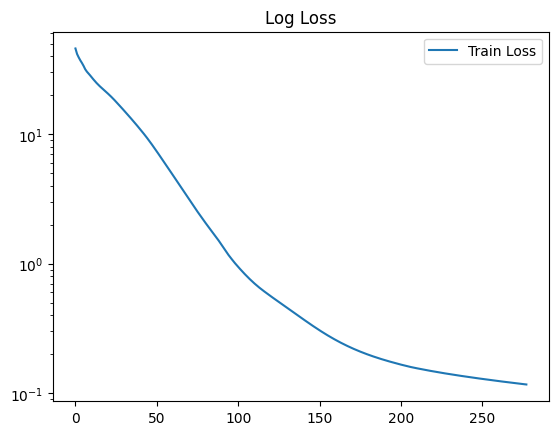

In [29]:
trainer.train()

In [15]:
pred = model(batch["images"])
pred.shape

torch.Size([2, 8, 8, 60])

In [16]:
pred[0, 0, 0, :], pred[0, 1, 1, :]

(tensor([-3.9462e-01, -1.1230e-01, -6.9168e-02,  1.6016e-01, -5.9085e+00,
          2.0061e-01,  3.2185e-02, -1.7628e-01,  1.1643e-01, -9.3103e-02,
         -2.1499e-01,  4.4524e-01, -4.0756e-01,  2.5660e-01, -4.4912e-01,
          3.6334e-01,  4.7141e-02, -3.0412e-01,  5.2850e-01, -9.9459e+00,
         -4.6275e-01, -6.8661e-01, -1.0211e+00, -9.2770e-01,  7.4557e-01,
         -8.3859e-01,  1.2773e+00, -5.8546e-01, -6.1444e-01, -8.1192e-01,
          8.3375e-01, -5.3556e-01,  1.4944e-01,  8.0637e-02, -8.4804e+00,
         -7.4178e-01,  3.6093e-01, -3.4259e-01,  6.1325e-01,  1.1258e+00,
         -8.8351e-01, -3.1762e-01,  1.7881e+00, -5.7155e-01,  3.8759e-01,
          1.6574e-01, -8.6968e-01, -3.4068e-01, -3.8388e-01, -9.5233e+00,
          7.0744e-01,  5.9996e-03, -1.8295e-01,  2.8828e-01, -3.0996e-01,
          6.4816e-01, -2.1485e-01,  5.2846e-01, -7.8313e-01, -2.3655e-01],
        grad_fn=<SliceBackward0>),
 tensor([ -0.4688,  -0.1452,   0.0843,  -0.0742,  -6.2110,   0.1915,   0.024

In [17]:
i = 0

In [18]:
output = model.inference(
    batch["images"],
)

bounding_boxes = output.bboxes
bounding_boxes

[{'bboxes': tensor([[0.5902, 0.5322, 0.1639, 0.7420],
          [0.4427, 0.5000, 0.1967, 0.7416]]),
  'confidence': tensor([0.9987, 0.9971]),
  'labels': tensor([1, 7]),
  'scores': tensor([0.9994, 0.9993])},
 {'bboxes': tensor([[0.4532, 0.4565, 0.1962, 0.8695],
          [0.6075, 0.5000, 0.1495, 0.8700]]),
  'confidence': tensor([0.9965, 0.9933]),
  'labels': tensor([4, 6]),
  'scores': tensor([0.9994, 0.9993])}]

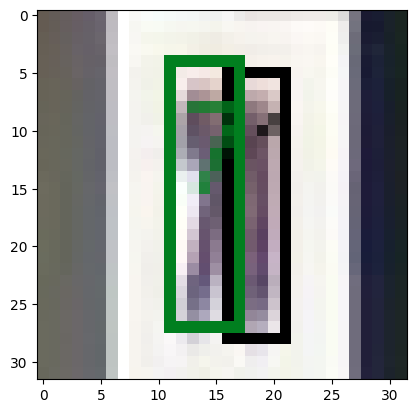

In [19]:
plt.imshow(
    draw_bounding_boxes(batch["images"][i],
                        box_convert(
                            bounding_boxes[i]["bboxes"], 
                            "cxcywh",
                            "xyxy"
                        ), 
                        bounding_boxes[i]["labels"]
)
)

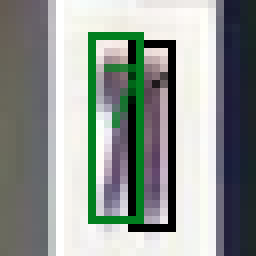

In [20]:
draw_bounding_boxes(batch["images"][i],
                        box_convert(
                            bounding_boxes[i]["bboxes"], 
                            "cxcywh",
                            "xyxy"
                        ), 
                        bounding_boxes[i]["labels"]
).resize((256, 256), 0)

In [22]:
calculate_mAP(
    model,
    trainer.train_loader,
)

100%|██████████| 522/522 [02:37<00:00,  3.30it/s]


{'map': 8.38032519823173e-06,
 'map_50': 4.9917543947231025e-05,
 'map_75': 3.415353830860113e-07,
 'map_small': 8.38032519823173e-06,
 'map_medium': -1.0,
 'map_large': -1.0,
 'mar_1': 0.0006142518250271678,
 'mar_10': 0.005399799440056086,
 'mar_100': 0.00685293972492218,
 'mar_small': 0.00685293972492218,
 'mar_medium': -1.0,
 'mar_large': -1.0,
 'map_per_class': -1.0,
 'mar_100_per_class': -1.0,
 'classes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}